# Sleep Disorder Dataset - Exploratory Data Analysis

## Introduction
This notebook analyzes sleep, lifestyle, and health data from 374 individuals to understand how different factors relate to sleep disorders such as insomnia and sleep apnea.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load
df = pd.read_csv('Sleep_disorder_data.csv')

# Clean column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('[()]', '', regex=True)
)

# Split blood pressure
if 'blood_pressure' in df.columns:
    df[['systolic', 'diastolic']] = (
        df['blood_pressure'].str.split('/', expand=True).astype(int)
    )
    df.drop(columns=['blood_pressure'], inplace=True)

df.head()


,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,systolic,diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


## Data Cleaning
- Renamed columns to snake_case
- Verified there are no missing values
- Split blood pressure into "systolic" and "diastolic"


In [16]:
print(df.shape)
print(df.isnull().sum())
df.describe()
df['sleep_disorder'].value_counts()


(374, 14)
person_id                    0
gender                       0
age                          0
occupation                   0
sleep_duration               0
quality_of_sleep             0
physical_activity_level      0
stress_level                 0
bmi_category                 0
heart_rate                   0
daily_steps                  0
sleep_disorder             219
systolic                     0
diastolic                    0
dtype: int64


,count
sleep_disorder,
Sleep Apnea,78
Insomnia,77


## Univariate Analysis - Histograms
Histograms for numeric columns like age, sleep duration, stress level, etc., to understand distributions.


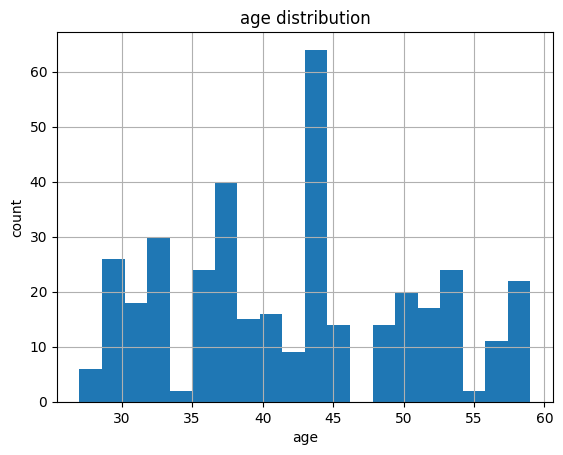

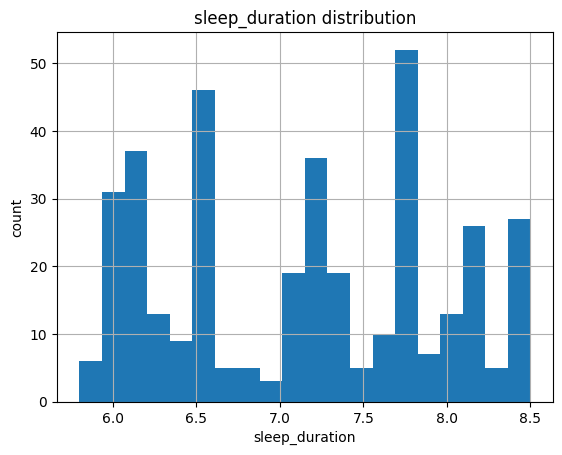

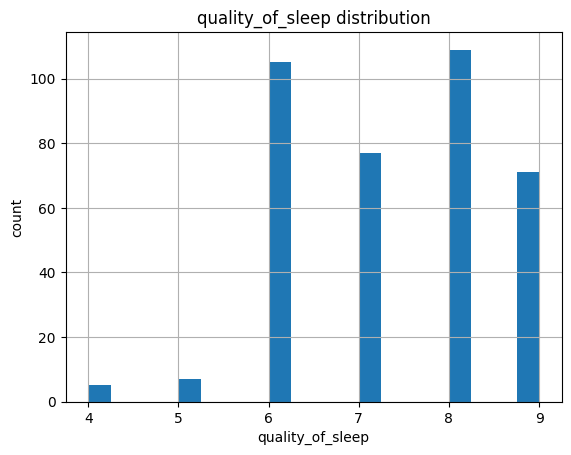

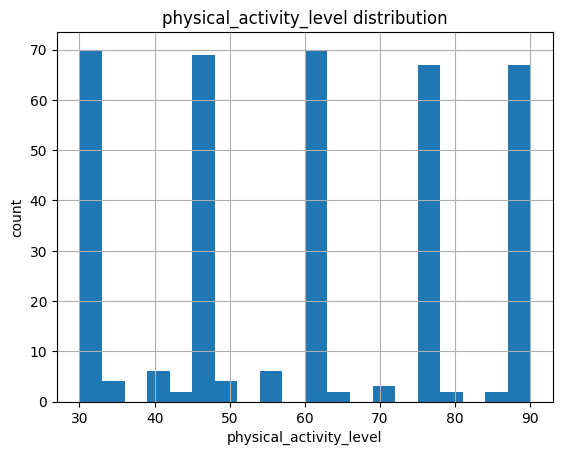

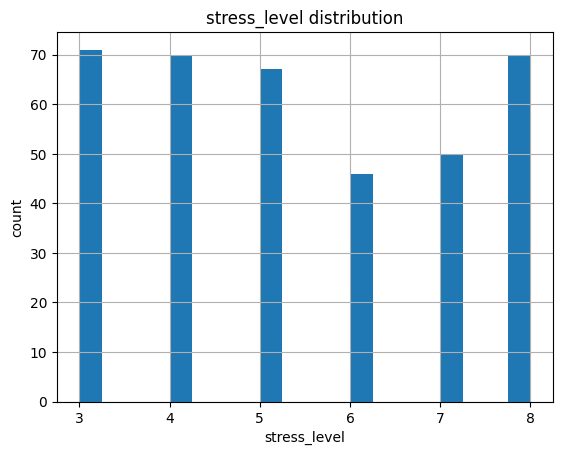

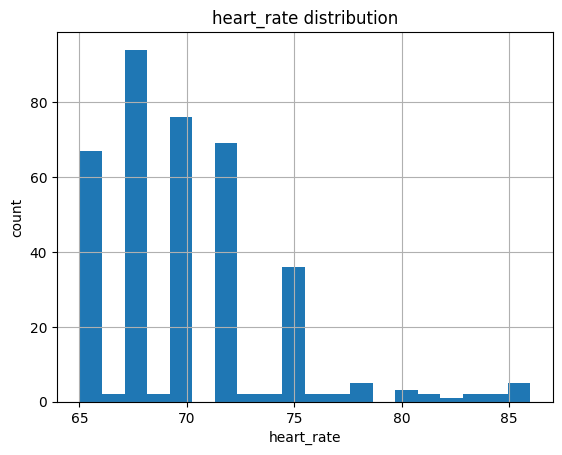

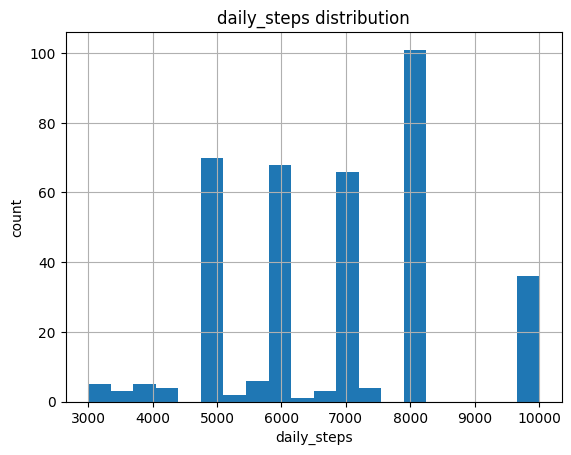

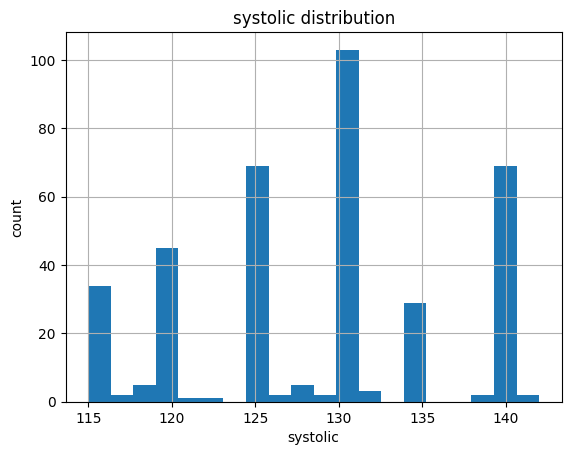

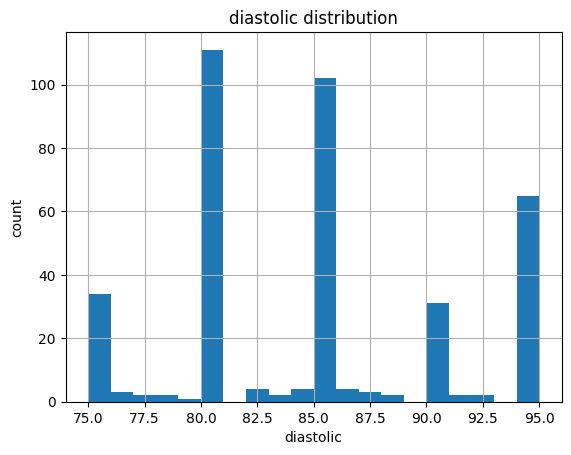

In [17]:
numeric_cols = ['age', 'sleep_duration', 'quality_of_sleep',
                'physical_activity_level', 'stress_level',
                'heart_rate', 'daily_steps', 'systolic', 'diastolic']

for col in numeric_cols:
    df[col].hist(bins=20)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()


## Univariate Analysis - Countplots
We visualize categorical variables like gender, occupation, BMI category, and sleep disorder.


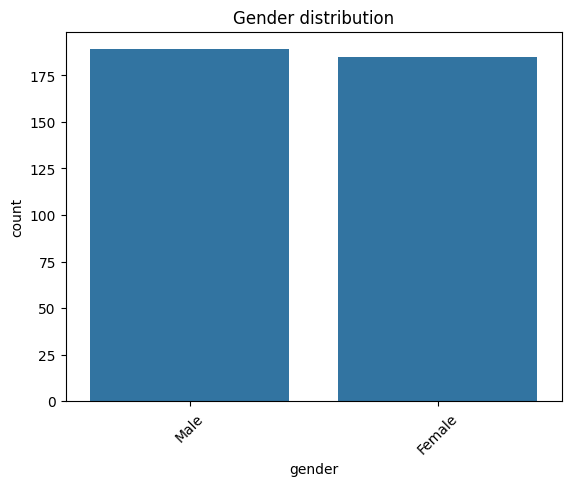

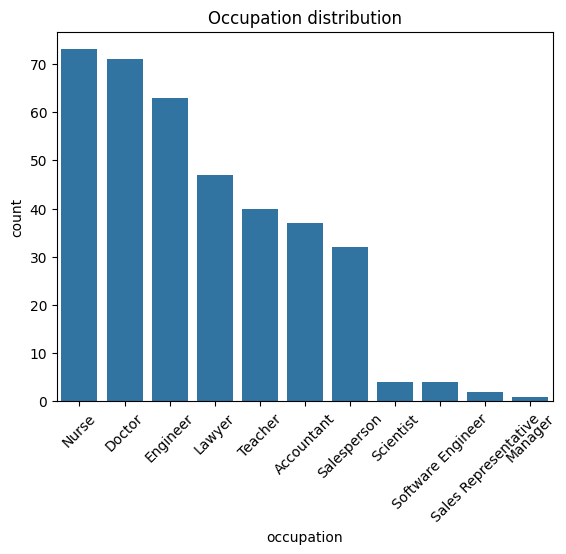

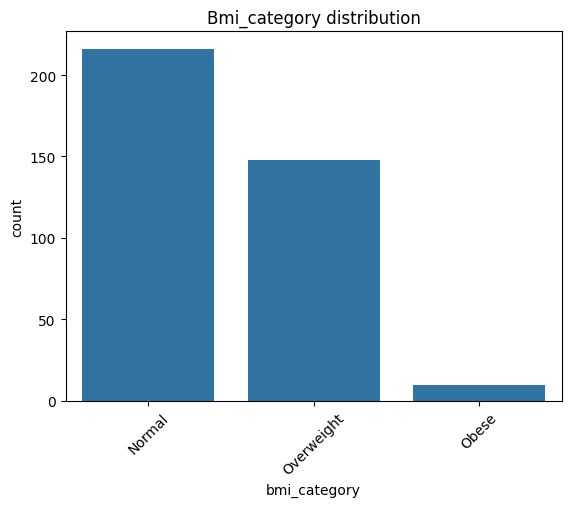

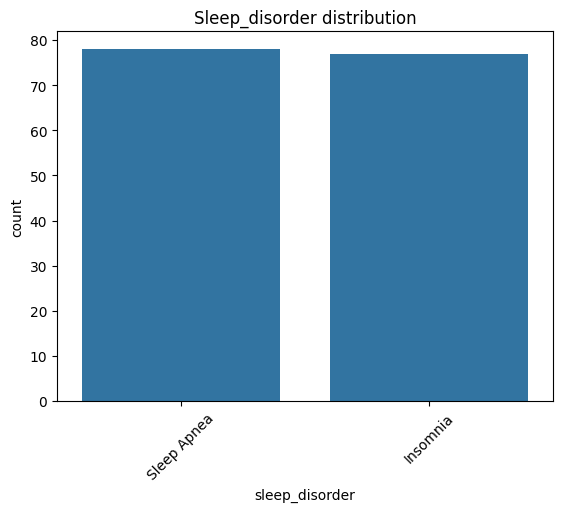

In [18]:
# Countplots
for col in ['gender', 'occupation', 'bmi_category', 'sleep_disorder']:
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'{col.capitalize()} distribution')
    plt.xticks(rotation=45)
    plt.show()


## Bivariate Analysis
These plots help understand relationships between variables.

Boxplot: Sleep Duration across Sleep Disorders  
Violinplot: Stress Level by Sleep Disorder
Scatterplot: Steps vs Heart rate   
Scatterplot: Sleep Duration vs Quality of Sleep  


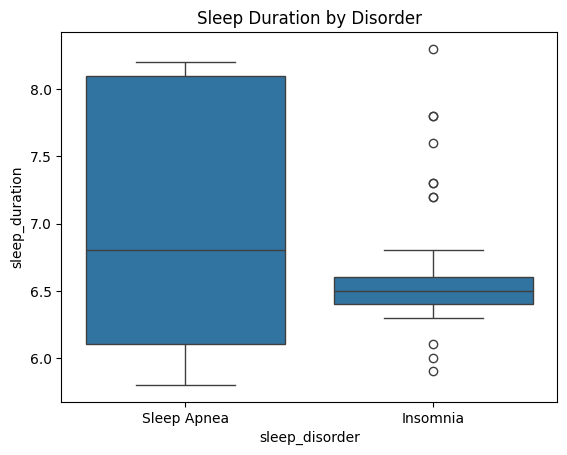

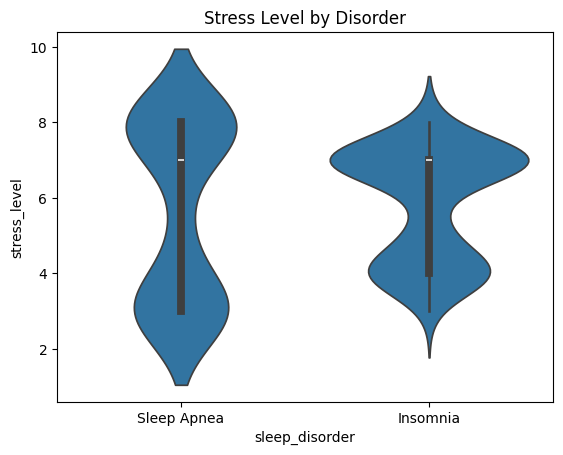

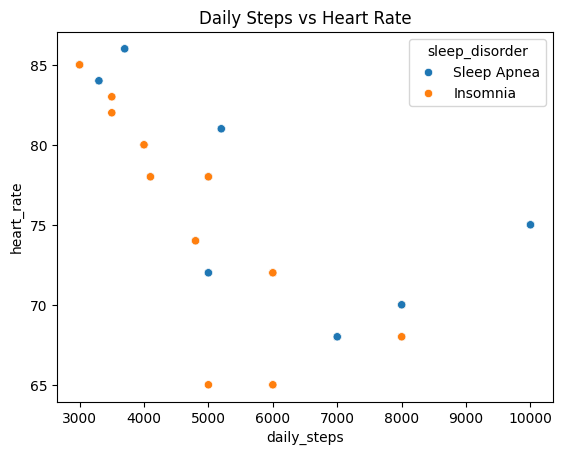

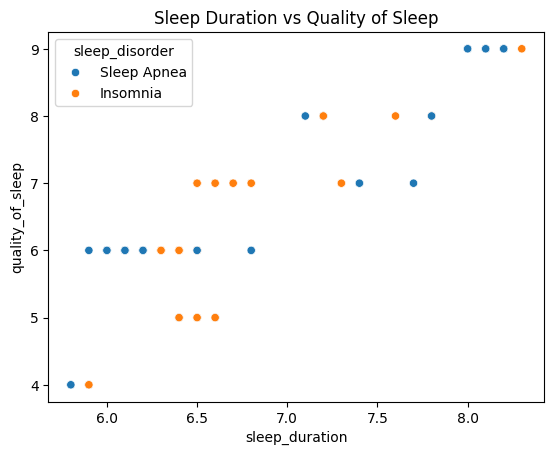

In [19]:
# Sleep duration vs disorder
sns.boxplot(x='sleep_disorder', y='sleep_duration', data=df)
plt.title('Sleep Duration by Disorder')
plt.show()

# Stress vs disorder
sns.violinplot(x='sleep_disorder', y='stress_level', data=df)
plt.title('Stress Level by Disorder')
plt.show()

# Scatter: steps vs heart rate
sns.scatterplot(x='daily_steps', y='heart_rate', hue='sleep_disorder', data=df)
plt.title('Daily Steps vs Heart Rate')
plt.show()

# Scatter: Sleep Duration vs Quality of Sleep
sns.scatterplot(x='sleep_duration', y='quality_of_sleep', hue='sleep_disorder', data=df)
plt.title('Sleep Duration vs Quality of Sleep')
plt.show()


## Correlation Heatmap
We compute the correlation between all numeric features to check for linear relationships.


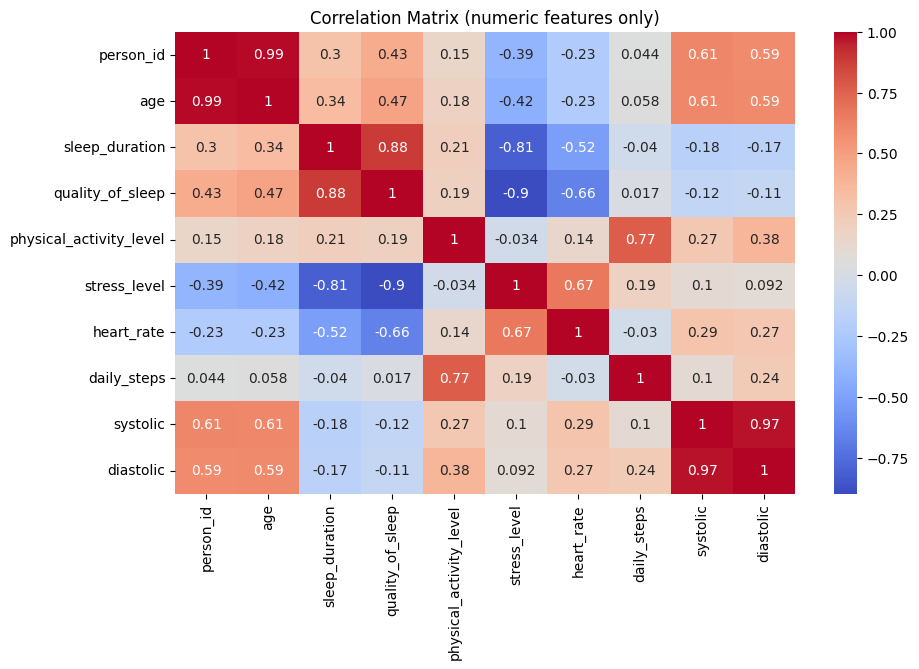

In [20]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (numeric features only)')
plt.show()


## Pairplot - Multivariate Exploration
We explore how multiple features relate to each other and sleep disorder using a pairplot.


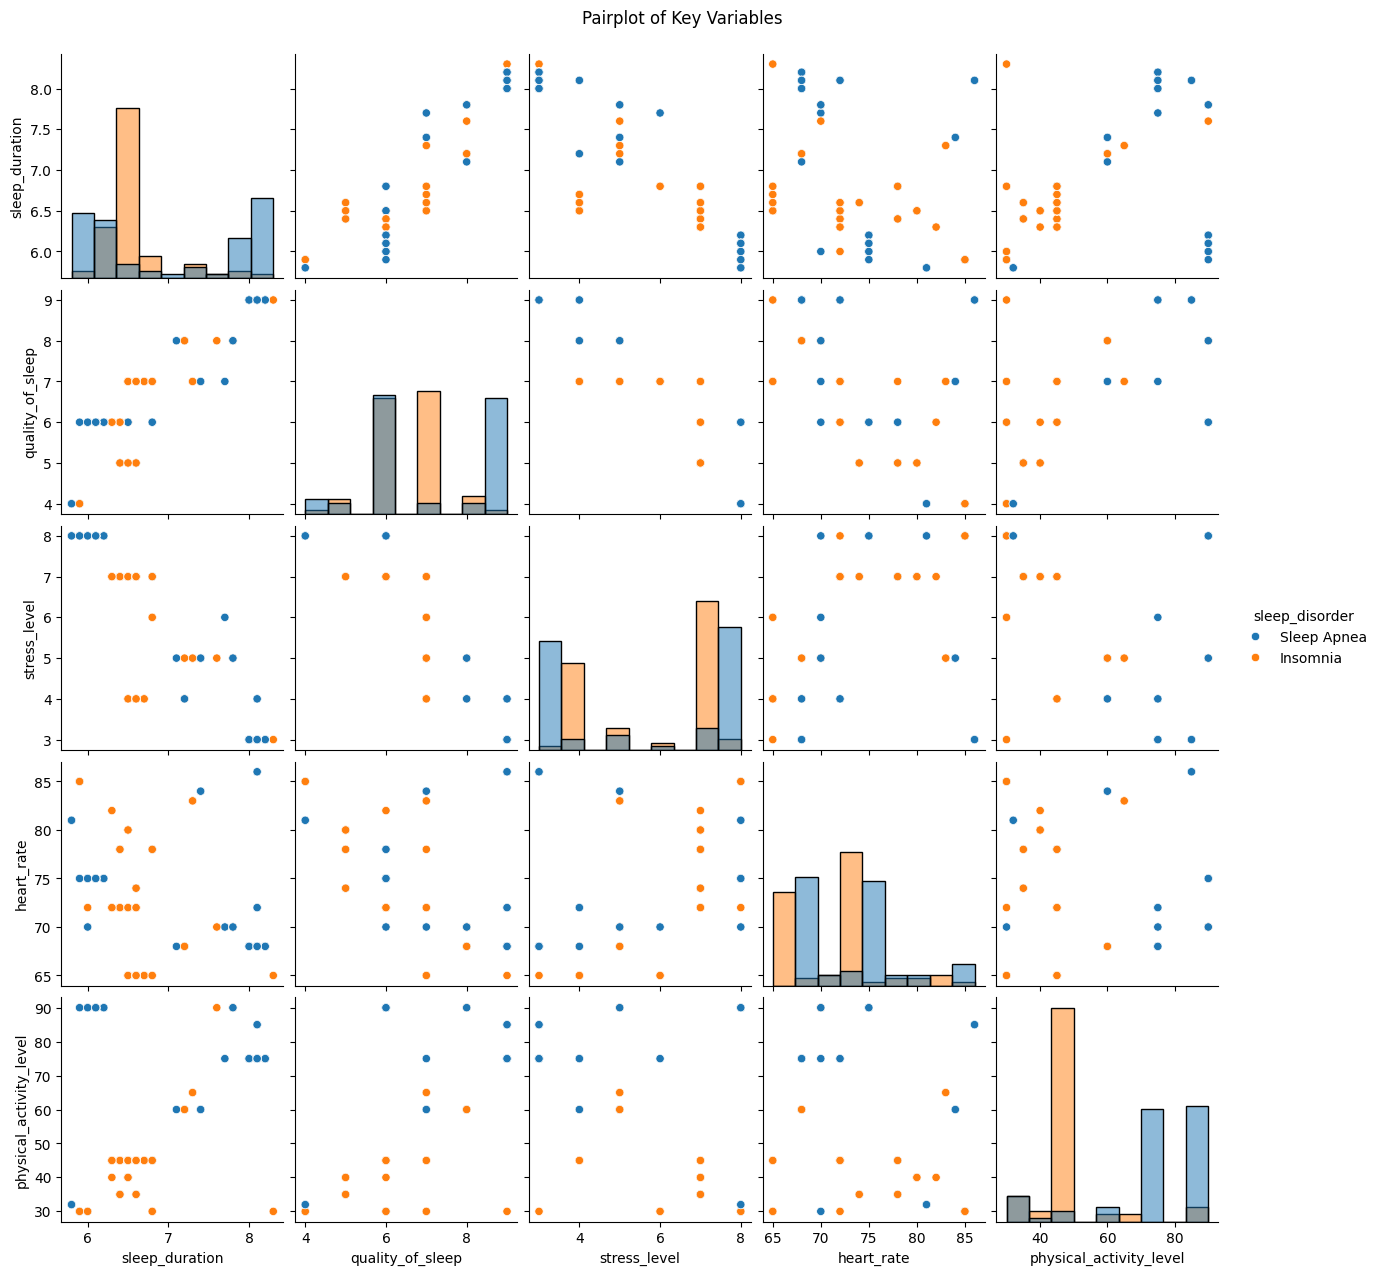

In [21]:
# Pairplot
sns.pairplot(df[['sleep_duration', 'quality_of_sleep',
                 'stress_level', 'heart_rate',
                 'physical_activity_level', 'sleep_disorder']],
             hue='sleep_disorder', diag_kind='hist')
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()


## Grouped Analysis
Barplots show how sleep disorders vary across:

- Gender
- Age Group
- Occupation
- BMI Category


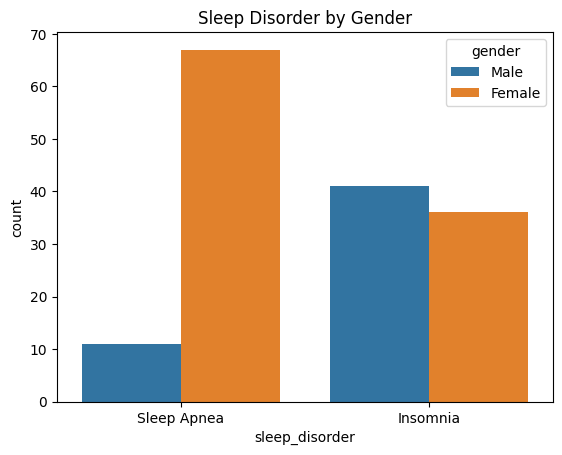

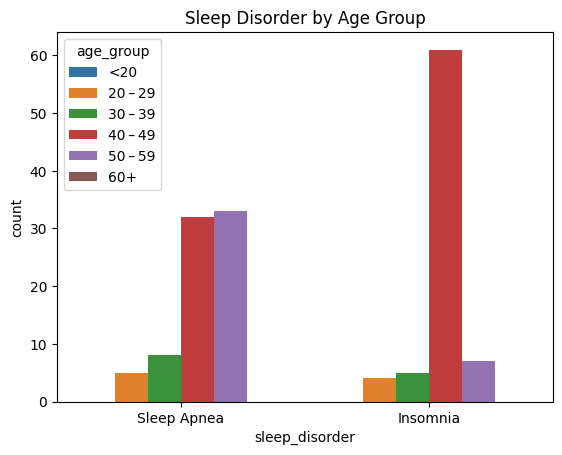

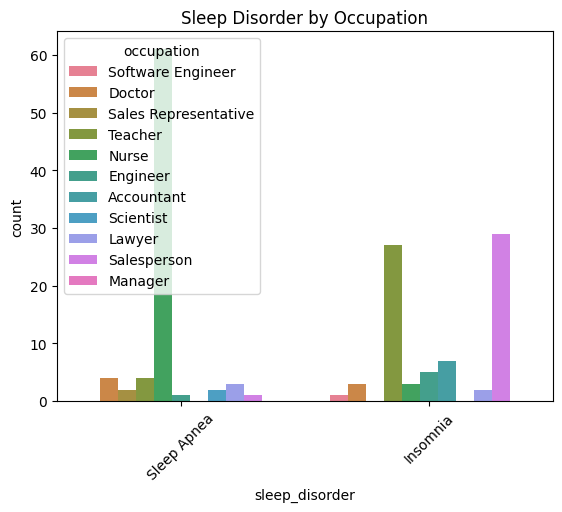

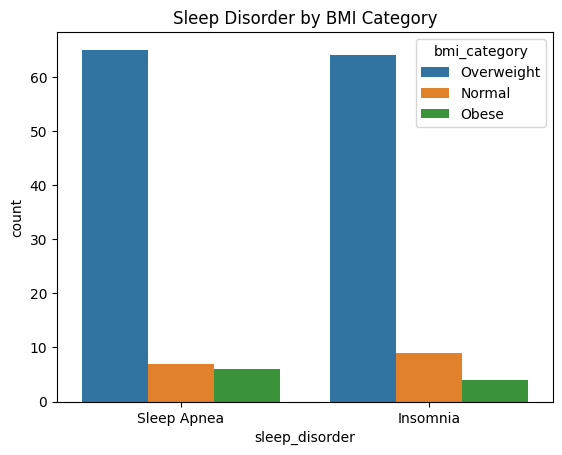

In [22]:
# Age groups for grouped bar plots
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['<20', '20 – 29', '30 – 39', '40 – 49', '50 – 59', '60+'])

# Disorder vs Gender
sns.countplot(x='sleep_disorder', hue='gender', data=df)
plt.title('Sleep Disorder by Gender')
plt.show()

# Disorder vs Age Group
sns.countplot(x='sleep_disorder', hue='age_group', data=df)
plt.title('Sleep Disorder by Age Group')
plt.show()

# Disorder vs Occupation
sns.countplot(x='sleep_disorder', hue='occupation', data=df)
plt.title('Sleep Disorder by Occupation')
plt.xticks(rotation=45)
plt.show()

# Disorder vs BMI Category
sns.countplot(x='sleep_disorder', hue='bmi_category', data=df)
plt.title('Sleep Disorder by BMI Category')
plt.show()


# Predictive Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

y = df['sleep_disorder'].astype('category').cat.codes     # 0=Insomnia,1=None,2=Sleep Apnea
X = df.drop(columns=['sleep_disorder', 'person_id'])

# One‑hot encode remaining categoricals
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

          -1       0.96      0.95      0.95        55
           0       0.68      0.88      0.77        17
           1       0.89      0.73      0.80        22

    accuracy                           0.88        94
   macro avg       0.84      0.85      0.84        94
weighted avg       0.89      0.88      0.88        94



## 8. Advanced Feature Engineering & Deeper Insights

In [25]:
# Blood Pressure Risk Category
def bp_category(sys, dia):
    if sys >= 140 or dia >= 90:
        return 'High BP'
    elif sys >= 120 or dia >= 80:
        return 'Prehypertension'
    else:
        return 'Normal'

df['bp_risk'] = df.apply(lambda row: bp_category(row['systolic'], row['diastolic']), axis=1)

# Physical Activity Level Category
def activity_level(minutes):
    if minutes < 30:
        return 'Sedentary'
    elif minutes <= 60:
        return 'Moderate'
    else:
        return 'Active'

df['activity_level_cat'] = df['physical_activity_level'].apply(activity_level)

# Sleep Efficiency = quality_of_sleep / sleep_duration
df['sleep_efficiency'] = df['quality_of_sleep'] / df['sleep_duration']

# Steps per active minute
df['steps_per_min'] = df['daily_steps'] / df['physical_activity_level']

# Custom Risk Score (composite indicator)
df['risk_score'] = (
    0.3 * df['stress_level'] +
    0.3 * (10 - df['quality_of_sleep']) +
    0.2 * df['heart_rate'] / 100 +
    0.2 * df['systolic'] / 140
)


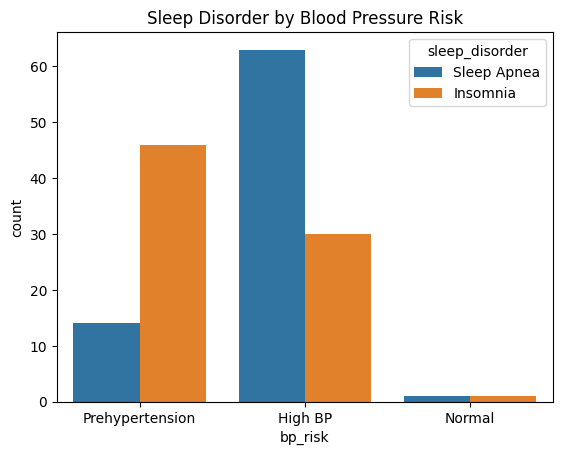

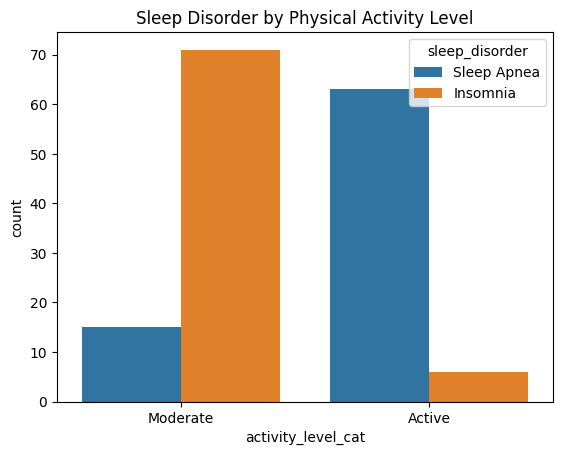

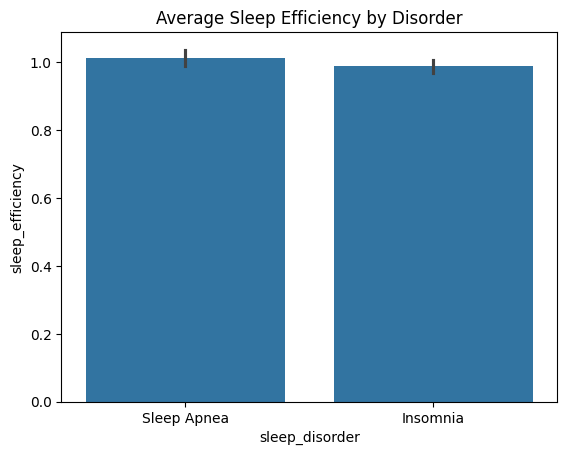

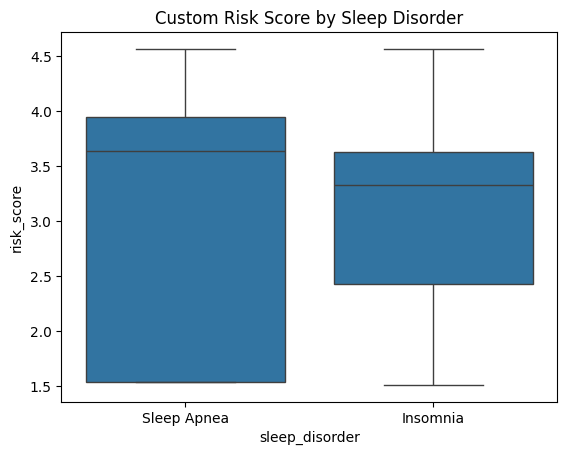

In [26]:
# Sleep Disorder by BP Risk
sns.countplot(x='bp_risk', hue='sleep_disorder', data=df)
plt.title('Sleep Disorder by Blood Pressure Risk')
plt.show()

# Sleep Disorder by Activity Level
sns.countplot(x='activity_level_cat', hue='sleep_disorder', data=df)
plt.title('Sleep Disorder by Physical Activity Level')
plt.show()

# Sleep Efficiency by Disorder
sns.barplot(x='sleep_disorder', y='sleep_efficiency', data=df)
plt.title('Average Sleep Efficiency by Disorder')
plt.show()

# Risk Score by Disorder
sns.boxplot(x='sleep_disorder', y='risk_score', data=df)
plt.title('Custom Risk Score by Sleep Disorder')
plt.show()


Random Forest Performance:
              precision    recall  f1-score   support

          -1       0.96      0.98      0.97        55
           0       0.70      0.82      0.76        17
           1       0.89      0.73      0.80        22

    accuracy                           0.89        94
   macro avg       0.85      0.84      0.84        94
weighted avg       0.90      0.89      0.89        94



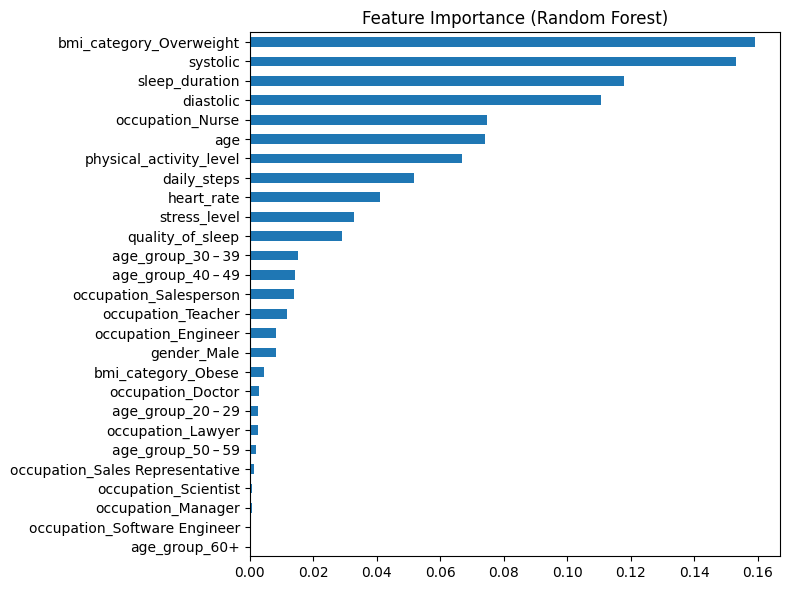

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6), title='Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


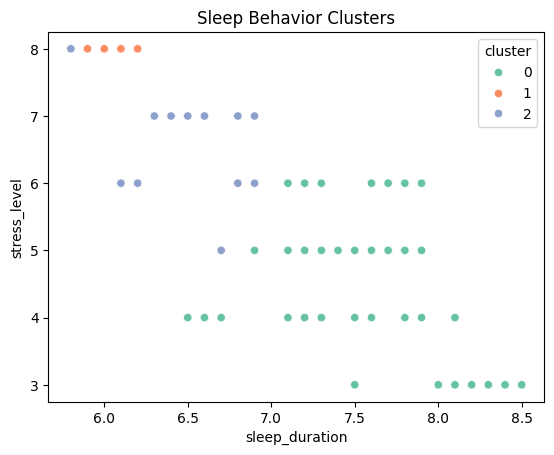

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X_cluster = df[['sleep_duration', 'stress_level', 'physical_activity_level']]
X_scaled = StandardScaler().fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x='sleep_duration', y='stress_level', hue='cluster', data=df, palette='Set2')
plt.title('Sleep Behavior Clusters')
plt.show()


## Key Insights

- Insomnia group sleeps the least, followed by Sleep Apnea group.
- Stress level is significantly higher among those with sleep disorders.
- Sleep Apnea is associated with higher systolic pressure.
- Younger individuals (<30) mostly report no sleep disorders.
- Nurses show a notably high number of Insomnia cases,